<a href="https://colab.research.google.com/github/mabdelmagid-sketch/Assignment-1-Deep-Learning/blob/main/Labs/lab1/lab1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/sherifmost/DeepLearning/blob/master/Labs/lab1/lab1_part2.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Copyright Information

**Parts of this assignment are based on Kaggle kernels.**

# Assignment 1 - Part2: Logistic Regression

![Logistic Regression](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/logistic_regression.png)

## 1.2.1 Problem Statement

Here, we are trying to increase the people's attention regarding the heart diseases. Like any disease, it is always better to know if you are sick early so you can get the treatment you need before it is too late. Therefore, we use a dataset that gathered some information about two groups: a group with a heart disease and the other group has no disease.
The gathered information includes age, chest pain type, fasting blood sugar, etc.

Your goal is to train a logistic regression model to predict if a person has a heart disease or not depending on the given information.

## 1.2.2 Problem Details

Let's dive into the code, explain it and show you the parts you need to fill!

### 1.2.2.1 Import Needed packages

**Pay close attention to the packages I imported for you**, they will help in the TODOs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.initializers import RandomNormal, RandomUniform
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalHinge
from tensorflow.keras import regularizers

### 1.2.2.2 Work on the dataset

This dataset contains 13 features that demonstrate the health state of a person and our target (0 if this person does not have a heart disease and 1 if he has a heart disease.)

We first load the dataset.

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_heart.csv")

A sneak peak on the dataset and how it looks like.

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Define input and output.

In [43]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

**TODO: Preprocess your data**

1.   Do you need to scale the data? Which type of scaling is better?
2.   Try adding non-linearity by including artificial features (**check the FAQs document**).

![The effect of the boundary with artificial features](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/artificial_features_boundaries.png)

You might have a look on part1 preprocessing and take hints from there.

**Try different types of data preprocessing and include their effect on the accuracy in your report.**


**Make sure to add the following to the report:**


*   Include the default case that no data preprocessing is done (2.1 in the report)
*   Try out two different data preprocessing techniques and include them (2.2, 2.3 in the report)
*   Include the default case that no artificial features are added (2.4 in the report)
*   Try out including artificial features (2.5 in the report)



# Default case, No Data Preprocessing done.

First change: Dummy variables for categorical variables

First, we need to see the categorical columns ( I found out a problem that not all categorical features are encoded as objects. So, I have done some EDA to see which ones are categorical)

In [24]:
for col in dataset.columns:
    print(f"{col}:")
    print(dataset[col].unique())
    print("-" * 40)


age:
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
----------------------------------------
sex:
[1 0]
----------------------------------------
cp:
[3 2 1 0]
----------------------------------------
trestbps:
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
----------------------------------------
chol:
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 2

As we can see, the mulitvalued categorical features are: slope, ca, thal,  restecg, cp. (For the binary ones, they are already encoded so there is no need to create another variables for the other category as this might cause multicollinearity)

In [25]:
# Get Numerical Fields
categorical_cols = ['slope', 'ca', 'thal',  'restecg', 'cp']

X = pd.get_dummies(dataset.iloc[:, 0:13], columns=categorical_cols)
y = dataset.iloc[:, 13].values

In [45]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = # TODO: Data Pre-Processing

Split dataset into, training, validation and testing splits.

In [46]:
# Get Training Data
train_X, temporary_X, train_y, temporary_y = train_test_split(X, y, train_size=0.75, random_state=0)

# Get Validation & Testing Data
val_X, test_X, val_y, test_y = train_test_split(temporary_X, temporary_y, train_size=0.5, random_state=0)

# Preprocessing step #2 Standardization

Note that we first fit the standard scaler on the training set, then use that scaler on the testing and validation sets. (Note that the results for this preprocessing step is done with the first preprocessing step)

In [47]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
val_X = scaler.transform(val_X)

### 1.2.2.3 Define your model here (TODO)

Logistic Regression as a model is exactly like the Linear Regression except for the activation function.

Use this fact to define your model similar to part1 except for the actication function.

![Logistic Regression using Simple Perceptron](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/perceptron_activation.png)

**TODO**:
1. Try different [activation functions](https://www.tensorflow.org/api_docs/python/tf/keras/activations) and include in the report their effect on the accuracy and the training plot.
2. Try different [regularizers](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) and include in the report their effect on the accuracy and the training plot.


**Make sure to add the following to the report:**


*   Include the default case that sigmoid activation is used (2.6 in the report)
*   Try out another two activation functions and include them (2.7, 2.8 in the report)
*   Include the default case that no regularizer is added (2.9 in the report)
*   Try out two different regularizers and include them (2.10, 2.11 in the report)

In [48]:
activation = 'sigmoid'
regularizer = regularizers.l2(0.01)

layer_1 = Dense(
    1,
    activation=activation,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
)
model = Sequential([layer_1]) # TODO: Define the Model using Tensorflow.Keras

### 1.2.2.4 Compile your model and print a summary

**TODO**
1. Try different [losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) functions and include in the report their effect on the accuracy. Make sure that those losses functions are meant only for classification! Don't use losses functions that are meant for prediction!
2. Try different [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) and include in the report their effect on the accuracy and the training plot.

**Make sure to add the following to the report:**


*   Include the default case that Binary Crossentropy loss is used (2.12 in the report)
*   Try out another two losses and include them (2.13, 2.14 in the report)
*   Include the default case that adam optimizer is used (2.15 in the report)
*   Try out another optimizer and include it (2.16 in the report)

In [49]:
## TODO Try Different losses & optimizers here
model.compile(loss=BinaryCrossentropy(), metrics=['accuracy'], optimizer=Adam())
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 1.2.2.5 Train your model

In [51]:
hist = model.fit(train_X, train_y, verbose=0, validation_data=(val_X, val_y), batch_size=16, epochs=500) # I set verbose to 0 since it prints too much for 500 epochs. I want to code structure to be clean.

**The following cell generates the accuracy needed for the report**

Evaluate your testing split, to get the accuracy and the loss score.

In [52]:
score, accuracy = model.evaluate(test_X, test_y, batch_size=16, verbose=0)
print("Test fraction correct (NN-Loss) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Loss) = 0.39
Test fraction correct (NN-Accuracy) = 0.87


### 1.2.2.6 Visualize Accuracy

**The following cell generates the plots needed for the report**

Plot the training and validation accuracy. Try to interpret those plots.


**TODO: for each experiment you make, include the plot and accuracy in the report and indicate whether there exist any type of *overfitting or underfitting*.**

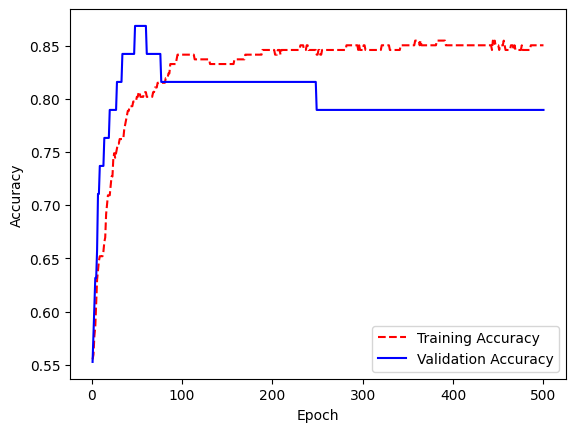

In [53]:
# Get training and test loss histories
training_loss = hist.history['accuracy']
val_loss = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 1.2.3 Conclusion

That's it! Congratulations on training a logistic regression model.

Make sure you deliver all the requirements for the submission.